# Introduction

We have partnered with a leading Moroccan renewable energy company committed to providing efficient and sustainable energy solutions.

They want to develop a robust tool for optimizing energy usage in Agadir, a critical region for their operations.

Their goal is to create a machine learning model capable of accurately predicting power consumption in Zone 3.

To achieve this, we have compiled specific historical data, including power consumption records, weather conditions, and potential emission diffusion metrics.

By analyzing these factors, we aim to develop a model that can effectively anticipate energy demand, enabling us to make informed decisions regarding efficient expansion into further zones.

# Importing Required Libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# Load the Data set

In [5]:
#Load the data set
df = pd.read_csv("C:\\Users\\ragul\\project\\powerconsumption.csv")

In [6]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


# Exploaring Data Analysis

EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends.

Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variables.

In [9]:
#Check the First 5 rows
df.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [13]:
#Check the last 5 rows
df.tail(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,52416.0,18.810024,5.815476,3.247000,14.410000,18.780000,22.890000,40.01000
Humidity,52416.0,68.259518,15.551177,11.340000,58.310000,69.860000,81.400000,94.80000
WindSpeed,52416.0,1.959489,2.348862,0.050000,0.078000,0.086000,4.915000,6.48300
GeneralDiffuseFlows,52416.0,182.696614,264.400960,0.004000,0.062000,5.035500,319.600000,1163.00000
DiffuseFlows,52416.0,75.028022,124.210949,0.011000,0.122000,4.456000,101.000000,936.00000
PowerConsumption_Zone1,52416.0,32344.970564,7130.562564,13895.696200,26310.668692,32265.920340,37309.018185,52204.39512
PowerConsumption_Zone2,52416.0,21042.509082,5201.465892,8560.081466,16980.766032,20823.168405,24713.717520,37408.86076
PowerConsumption_Zone3,52416.0,17835.406218,6622.165099,5935.174070,13129.326630,16415.117470,21624.100420,47598.32636


# Checking the Duplicated & Null Values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [19]:
df.isna().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [21]:
df.duplicated().sum()

0

Our dataset does not have any null values and duplicates.

Now we can proceed with confidence, knowing that our dataset is clean and ready for further process.

In [23]:
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

# Data Visualization

Data visualization is a powerful tool for understanding patterns, trends, and relationships within your dataset.

Depending on the specific questions you want to explore and the characteristics of your data, you can customize these visualizations and explore additional techniques as needed.

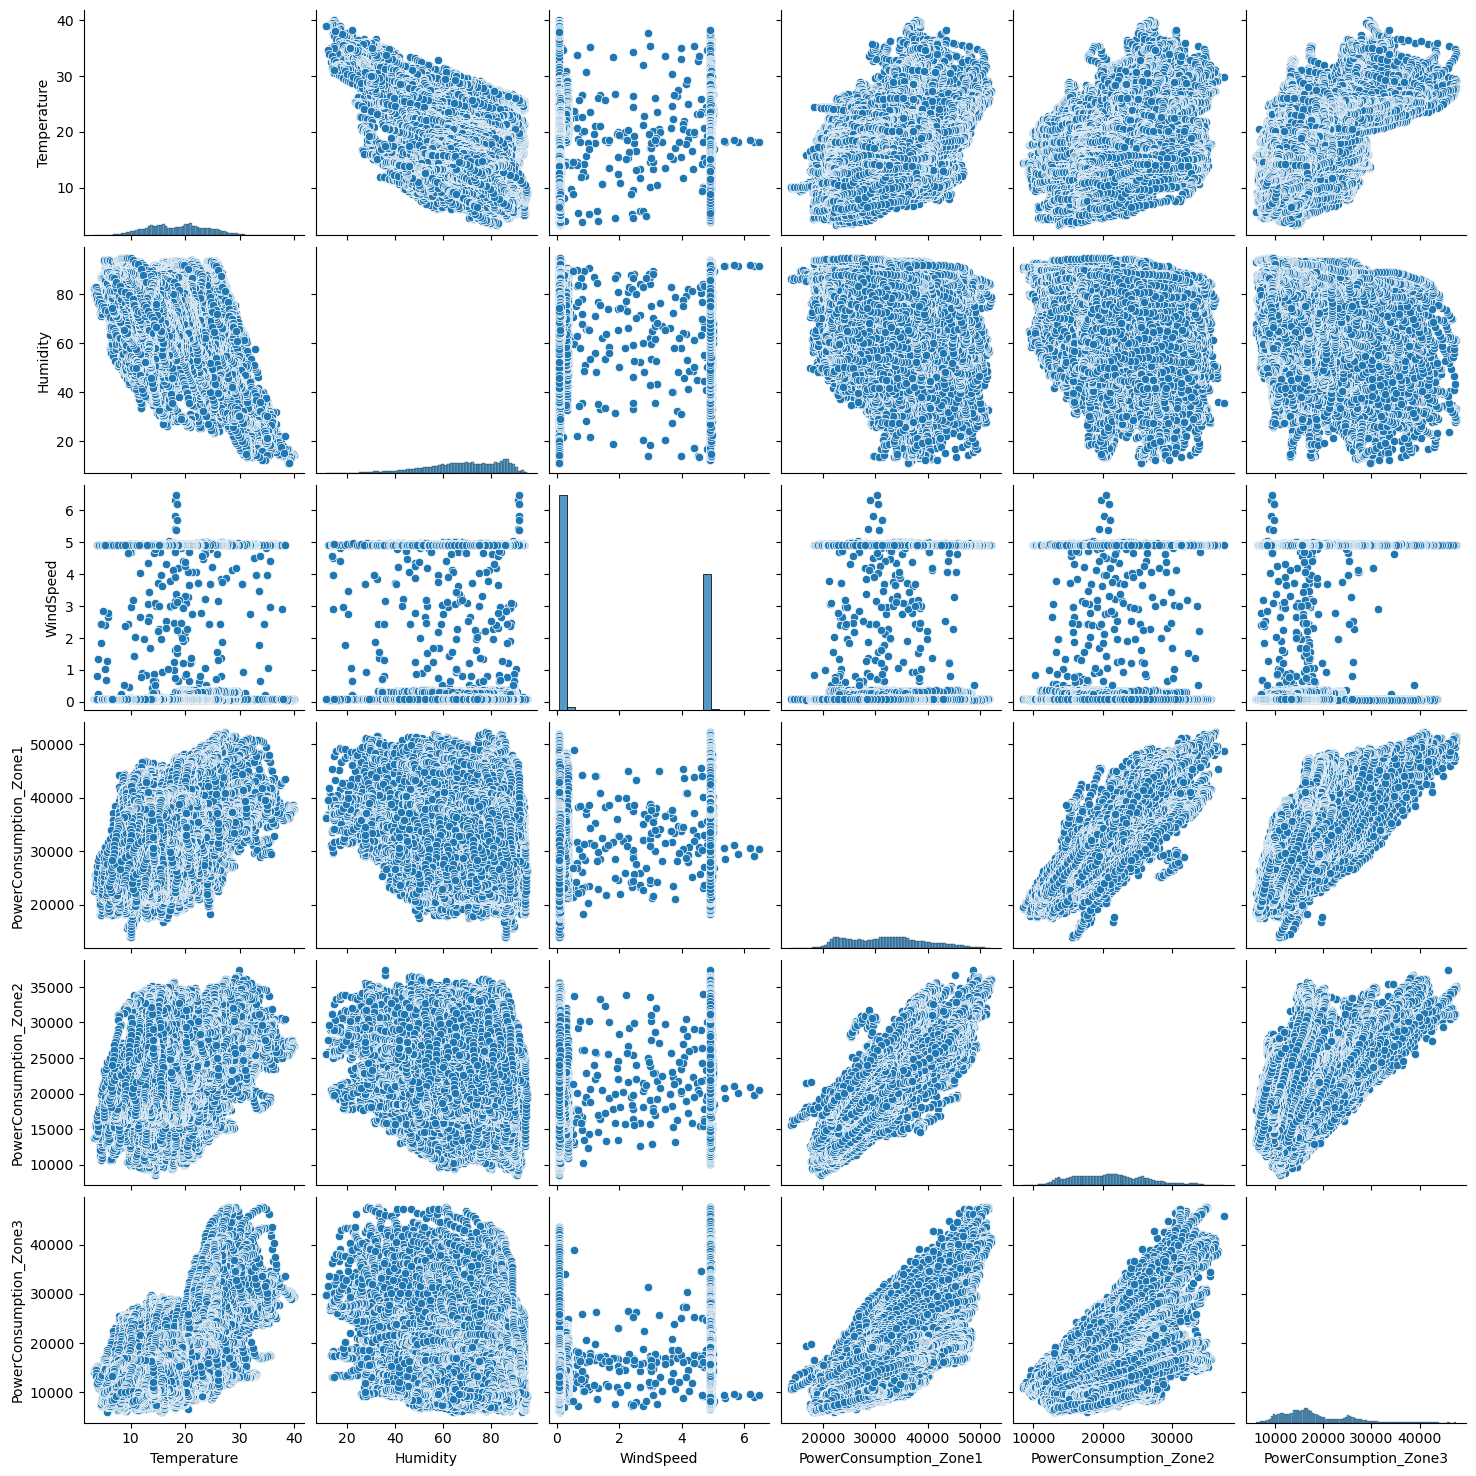

In [25]:
sns.pairplot(df[['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.show()

### Power Consumption Zone 1 

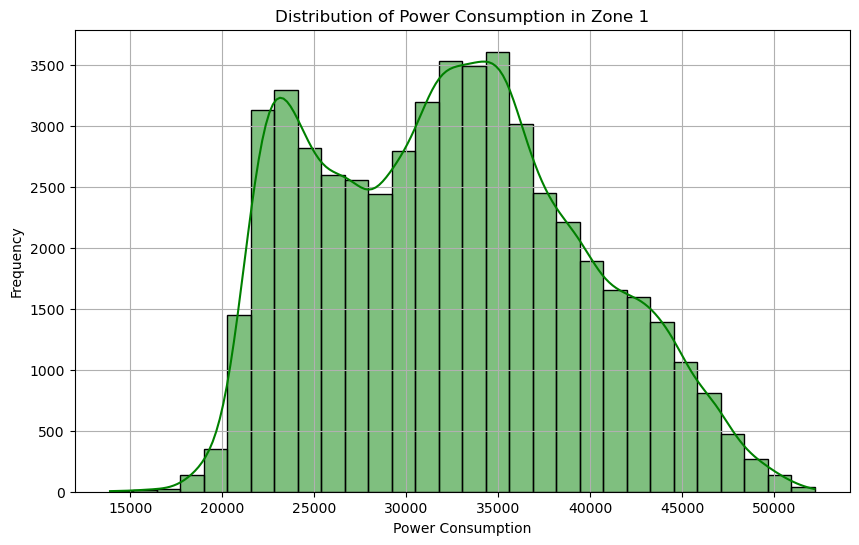

In [27]:
# Histogram: Distribution of Power Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['PowerConsumption_Zone1'], bins=30, kde=True, color='green')
plt.title('Distribution of Power Consumption in Zone 1')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Power Consumption Zone 2 

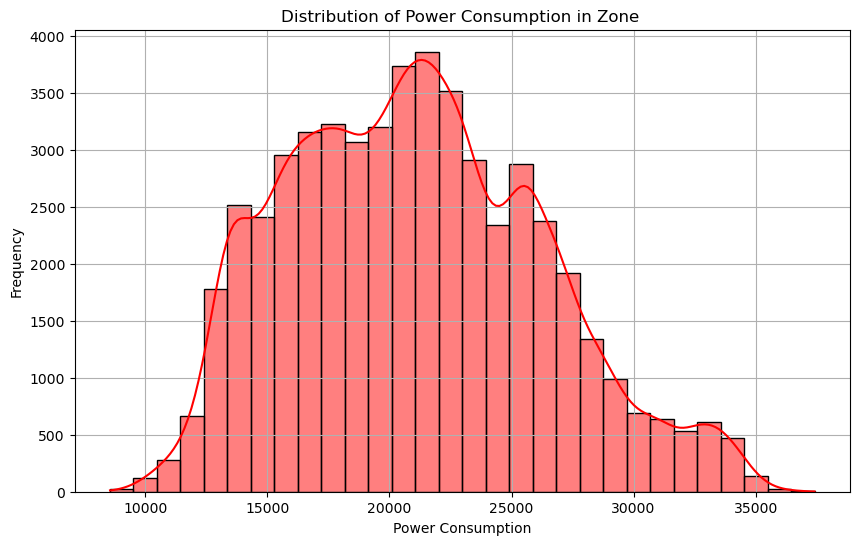

In [29]:
# Histogram: Distribution of Power Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['PowerConsumption_Zone2'], bins=30, kde=True, color='red')
plt.title('Distribution of Power Consumption in Zone ')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Power Consumption Zone 3 

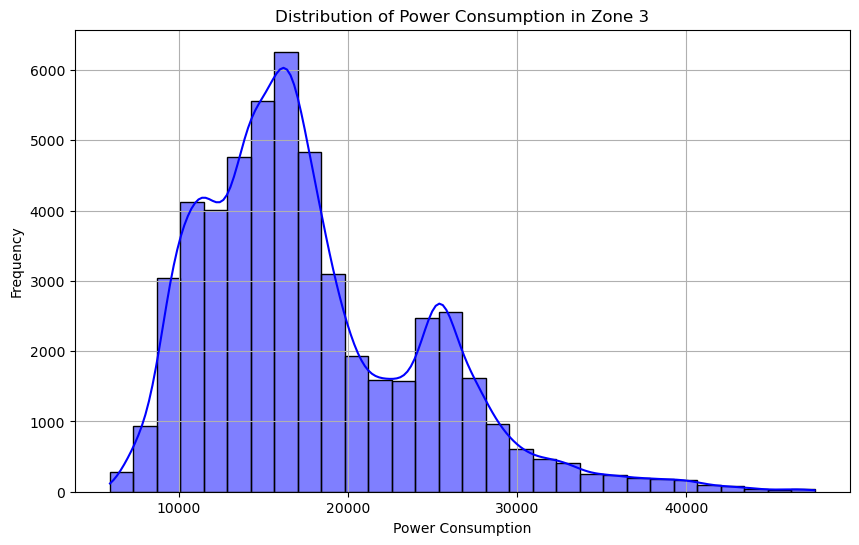

In [31]:
# Histogram: Distribution of Power Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['PowerConsumption_Zone3'], bins=30, kde=True, color='blue')
plt.title('Distribution of Power Consumption in Zone 3')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation heatmap

Correlation Analysis: Compute and visualize the correlation matrix to identify relationships between variables.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [37]:
cat_cols = df.select_dtypes(include='object').columns

In [39]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


<Axes: >

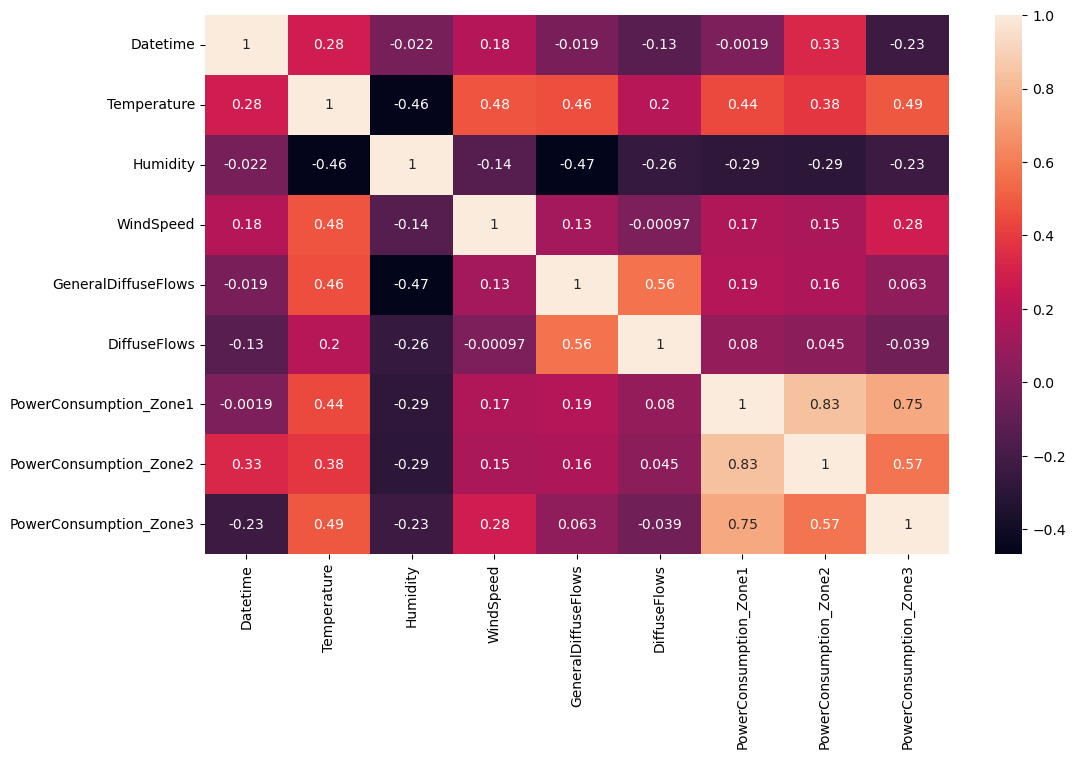

In [41]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

# Data preprocessing

## Chronological Order and Equidistant Timestamps

The data should be in chronological order and the timestamps should be equidistant in time series.

The chronological order can be achieved by sorting the dataframe by the timestamps.

Equidisant timestamps indicates constant time intervals.

To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

But, first of all, lets see how to check if our dataset is correctly formated.

In [43]:
chronological_order = df['Datetime'].is_monotonic_increasing

In [45]:
time_diffs = df['Datetime'].diff()
equidistant_timestamps = time_diffs.nunique() == 1

In [47]:
chronological_order, equidistant_timestamps

(True, True)

This is already the case in our data: The time interval is 10 minutes and the data is already in chronological order.

Therefore, we do not have to do this additional data preparation step.

# Encoding Categorical Variables

To convert categorical data into numerical, we will use the one-hot encoding technique.

This process involves assigning binary numeric values to each unique class present in columns with categorical data. 

By creating binary columns for each category, we ensure that our models can effectively interpret and utilize the categorical information during training and prediction.

In [49]:
#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df)
df_dummies.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  int32  
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 3.4 MB


# Split the the Data into Training & Testing

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Define the features and target variable
features = df.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])
target = df['PowerConsumption_Zone3']

In [57]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False, random_state=42)

we'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.2.

We will take Random State as 42 and shuffle=False. 

This will guarantee the reproducibility of our results across different runs.

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(41932, 6)
(10484, 6)
(41932,)
(10484,)


# Standard Scaler

We will now use Standard Scaler to standardize the features of the dataset.

This ensures that the consistency between the features of the dataset is maintained.

Standardization is crucial for certain machine learning algorithms, promoting optimal model performance by mitigating the influence of varying magnitudes among features.

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
ss = StandardScaler()

In [65]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(41932, 6)
(10484, 6)
(41932,)
(10484,)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  int32  
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 3.4 MB


# ML Model

## 1.Linear Regression 

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [72]:
LR = LinearRegression()

In [75]:
LR_model = LR.fit(x_train, y_train)

In [77]:
y_pred = LR_model.predict(x_test)

In [79]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 6528.454546074683
Root Mean Squared Error: 7823.959051161853


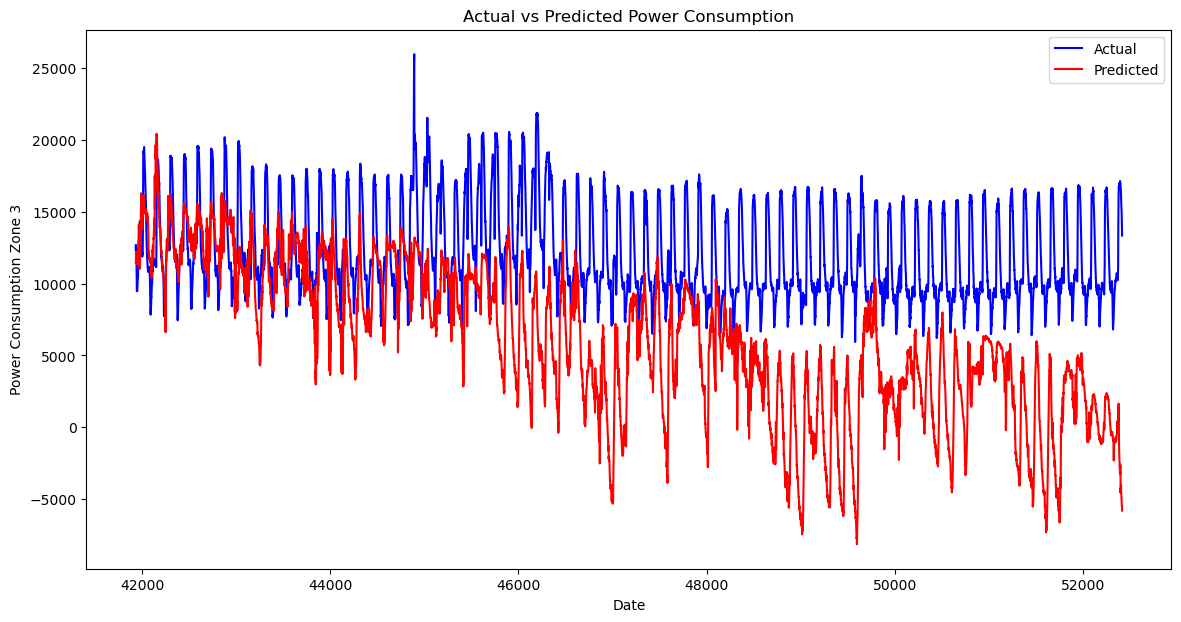

In [81]:
# Visualization: Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='b')
plt.plot(y_test.index, y_pred, label='Predicted', color='r')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 3')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()

Here Mean Absolute Error(MSE) and root Mean Square Error(RMSE) are very high.So i going to check with Lasso Regression Model

## 2.Lasso Regression

In [83]:
from sklearn.linear_model import Lasso

In [85]:
LSR = Lasso(alpha=1.0)

In [87]:
LSR_model = LSR.fit(x_train, y_train)

In [89]:
y_pred = LSR_model.predict(x_test)

In [91]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 6512.707554217594
Root Mean Squared Error: 7806.512925526607


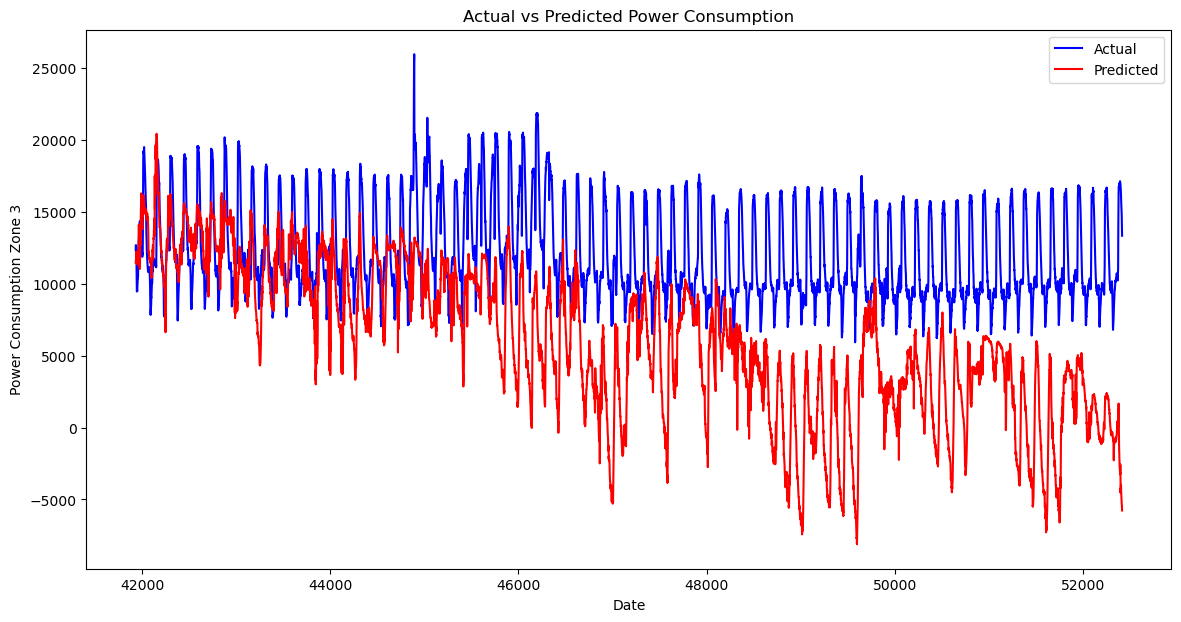

In [93]:
# Visualization: Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='b')
plt.plot(y_test.index, y_pred, label='Predicted', color='r')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 3')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()

Here Mean Absolute Error(MSE) and root Mean Square Error(RMSE) are slight get low not very low .So i going to check with Decession Tree Regressor Model.

# 3.Decession Tree Regressor

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
# Create a Decision Tree Regressor Model
dt_reg = DecisionTreeRegressor(random_state=42)

In [99]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [101]:
y_pred = dt_reg.predict(x_test)

In [103]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3162.758074795212
Root Mean Squared Error: 3939.8766929478684


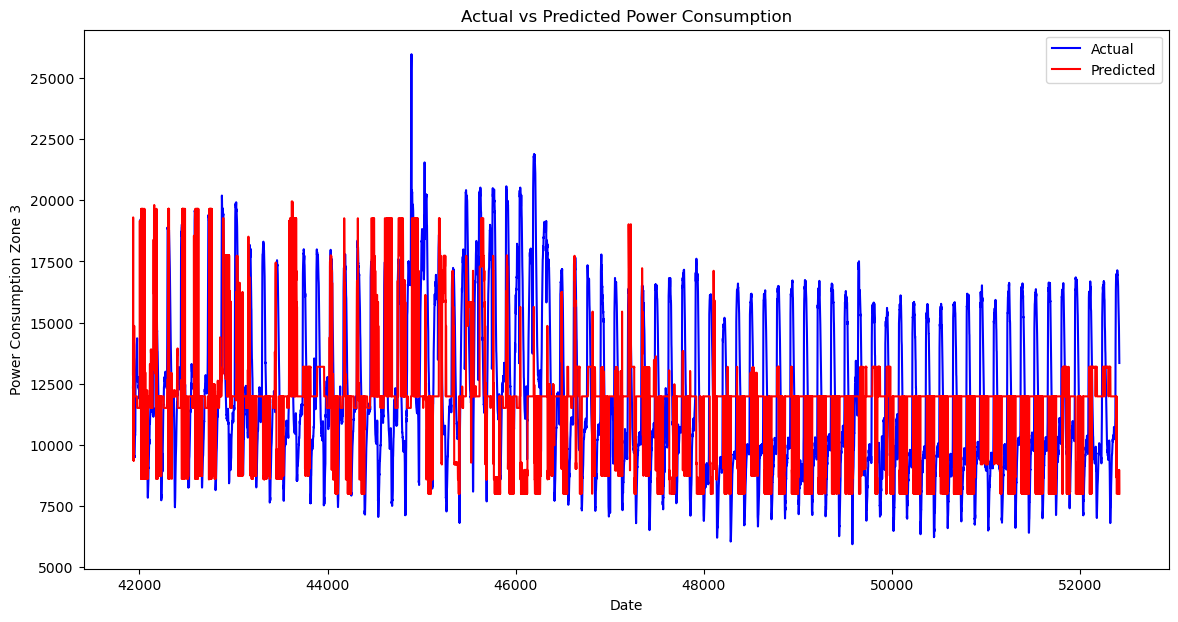

In [105]:
# Visualization: Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='b')
plt.plot(y_test.index, y_pred, label='Predicted', color='r')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 3')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()

Here Mean Absolute Error(MSE) and root Mean Square Error(RMSE) are  getting low .So i going to check with random Forest  Regressor Model.

##  4.Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
# Creating and training the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [111]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [113]:
y_pred = rf_model.predict(x_test)

In [115]:
#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4302.887182783676
Root Mean Squared Error: 5302.148026125721


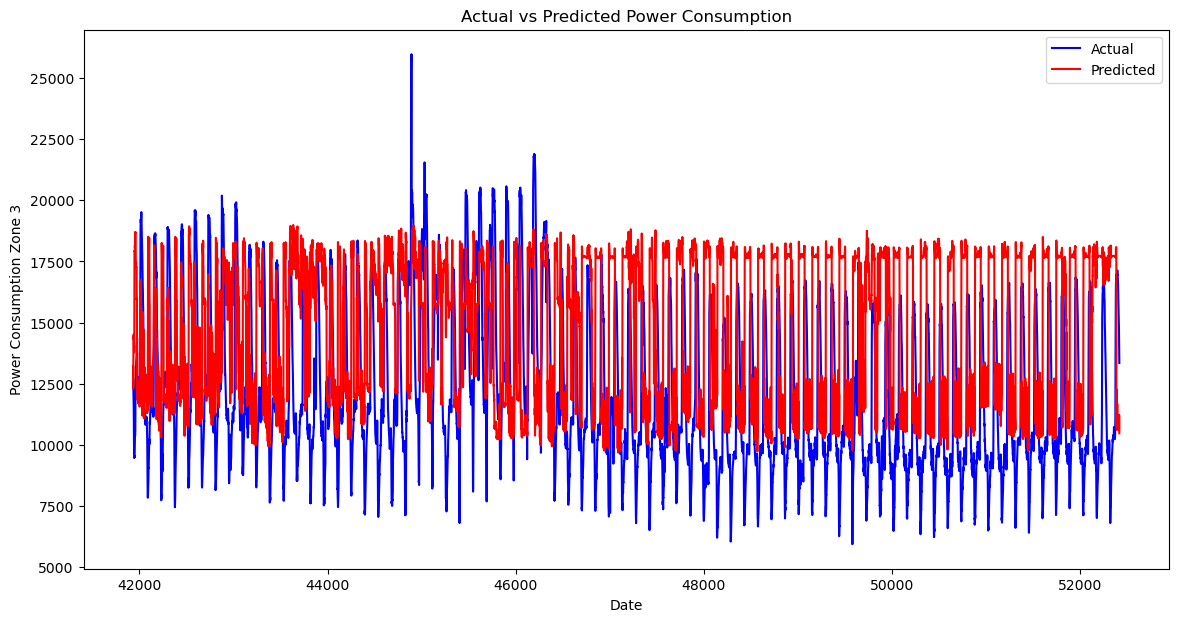

In [117]:
# Visualization: Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='b')
plt.plot(y_test.index, y_pred, label='Predicted', color='r')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 3')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()

Here Mean Absolute Error(MSE) are low  and root Mean Square Error(RMSE) are slightly incresase .So i going to check with XGBoost Regressor Model.

## 5. XGBoost 

In [119]:
from xgboost import XGBRegressor 

In [121]:
# Creating and training the XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [123]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [125]:
y_pred = xgb_model.predict(x_test)

In [127]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 2968.7919797070863
Root Mean Squared Error: 3823.6809336428973


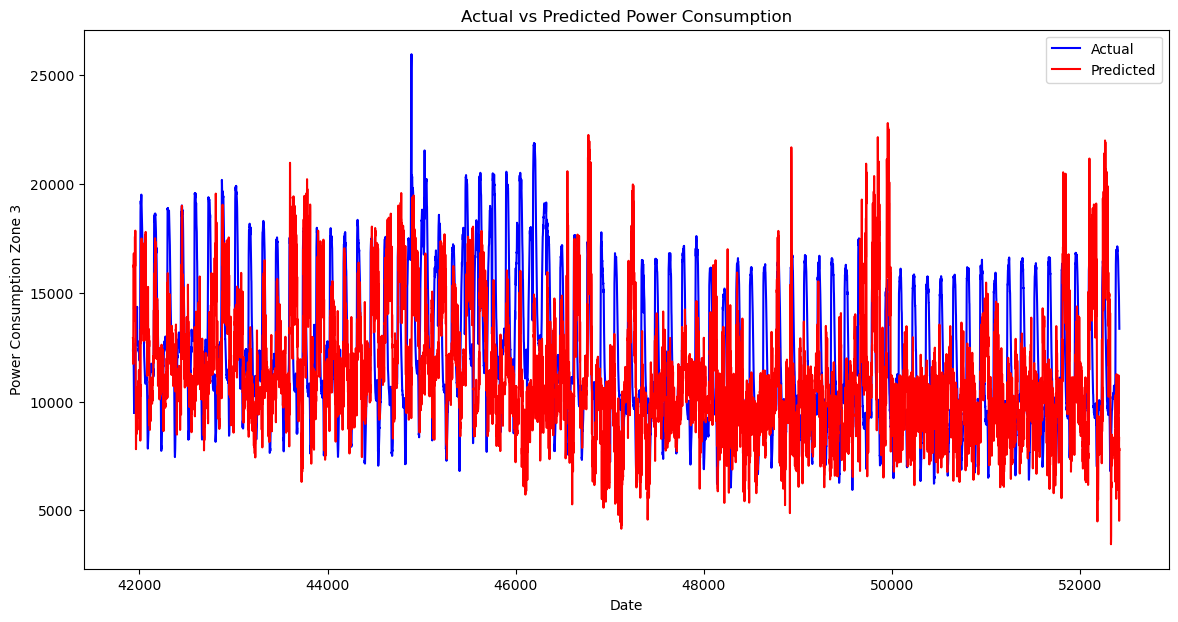

In [129]:
# Visualization: Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='b')
plt.plot(y_test.index, y_pred, label='Predicted', color='r')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 3')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()

Here Mean Absolute Error(MSE) are very low and root Mean Square Error(RMSE) are also low .XGBoost performance Well in my Model.

# Conclusion

Based on the analysis and evaluation of three regressor models — Linear Regressor,Lasso Regressor,Decession Tree Regression Random Forest Regressor, and XGBoost Regressor — for the Power Consumption Predection

Based on the performance evaluation metrics such as Mean Squared Error (MSE) & Root Mean Square error(RMSE), we can conclude that the and XGBoost Regressor generally perform very well then the Linear Regressor, Lasso regressor, Decession Tree Regreesor & Random Forest regressor

Overall, Linear regressor, Decession Tree , Lasso regressor  Random Forest and XGBoost regressors are promising models for predicting Power Consumption, with XGBoost potentially giving better performance.

As we all can see xgb boost gave us the best accuracy  for ZONE 3 Power Consumption. 